# Foundations of Data Science
## Homework 2

Student Name: Henry Tse

Student Netid: ht688
***

### Part 1: Case study (5 Points)
- Read [this article](http://www.nytimes.com/2012/02/19/magazine/shopping-habits.html) in the New York Times.
- Use what we've learned in class and from the book to describe how one could set Target's problem up as a predictive modeling problem, such that they could have gotten the results that they did.  Formulate your solution as a proposed plan using our data science terminology.  Include aspects of the Data Science Workflow that you see as relevant to solving the problem.  Be precise but concise.

Problem: To identify women in their second trimester to change their shopping habits.
First we must gather data, and explore the data through preprocessing by data sampling, cleaning, integration, and reduction techniques. 
We should:  Create subsets of the population that is a good presentation of the data
            Identify outliers and decide whether it is relevant to our model
            Correlation Analysis to determine difference between expected and observed frequencies
            Remove features that do not reduce uncertainty
The last step would be to model the data using modeling techniques such as linear regression. Through different features we can see if there's a correlation between the things women buy during their second trimester. 

### Part 2: Exploring data in the command line (4 Points - 1 Point Each)
For this part we will be using the data file located in `"data/loansData.csv"`. This file consists of records that pertain to some loan records in a local bank. There are 15 comma separated columns in this order: 

`CustNUm`, `Amount.Requested`,	`Amount.Funded.By.Investors`,	`Interest.Rate`,	`Loan.Length`,	`Loan.Purpose`,	`Debt.To.Income.Ratio`,	`State`,	`Home.Ownership`,	`Monthly.Income`,	`FICO.Range`,	`Open.CREDIT.Lines`,	`Revolving.CREDIT.Balance`,	`Inquiries.in.the.Last.6.Months`, and	`Employment.Length`. 

These fields contain data of type `int`, `float`, and `string`, and you can also locate a file `"data/loansData_columns.csv"`in the data folder containing all the column names for easy reference.  Answer the following questions using Linux/Unix bash commands. All questions can be answered in one line (sometimes, with pipes)! Some questions will have many possible solutions. Don't forget that in iPython notebooks you must prefix all bash commands with an exclamation point, i.e. `"!command arguments"`.

1\. How many records (lines) are in this file?

In [1]:
# Place your code here
!python -c "import csv; print(sum(1 for i in csv.reader(open('data/loansData.csv'))))"

2500


2\. How many unique `State` (the 8th field) are in this file? (hint: consider the 'cut' command and use pipe operator '|')

In [2]:
# Place your code here
! cat data/loansData.csv | cut -d ',' -f 8 | sort | uniq -c | wc -l

      46


3\. Rank all domains by the number of `Loan.Purpose` (the 6th field) they requested in descending order. (hint: consider the 'cut', 'uniq' and 'sort' commands and the pipe operator).

In [3]:
# Place your code here
! cat data/loansData.csv | cut -d ',' -f 6 | sort | uniq -c | sort -r

1307 debt_consolidation
 444 credit_card
 201 other
 152 home_improvement
 101 major_purchase
  87 small_business
  50 car
  39 wedding
  30 medical
  29 moving
  21 vacation
  20 house
  15 educational
   4 renewable_energy


4\. List all records which have `FICO.Range` (the 11th field) from 815-819. (hint: this can be done using 'grep')

In [4]:
# Place your code here
! cat data/loansData.csv | grep "815-819"

### Part 3: Dealing with data Pythonically (16 Points)

In [5]:
# You might find these packages useful. You may import any others you want!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1\. (1 Point) Load the data set `"data/ads_dataset.tsv"` and load it into a Python Pandas data frame called `ads`.

In [6]:
# Place your code here
ads = pd.read_table("data/ads_dataset.tsv")
print(ads)

       is_video_user  video_freq  call_freq  video_interval  call_interval  \
0                  0         NaN          1               0       0.000000   
1                  0         NaN          1               0       0.000000   
2                  0         NaN          1               0       0.000000   
3                  0         NaN          1               0       0.000000   
4                  0         NaN          2               0       0.500000   
...              ...         ...        ...             ...            ...   
54579              0         NaN          3               0      30.979170   
54580              0         NaN          2               0       1.041667   
54581              0         NaN          1               0       0.000000   
54582              0         NaN          1               0       0.000000   
54583              0         NaN          1               0       0.000000   

       expected_video_time  expected_call_time  last_bill  next

2\. (4 Points) Write a Python function called `getDfSummary()` that does the following:
- Takes as input a data frame
- For each variable in the data frame calculates the following features:
  - `number_nan` to count the number of missing not-a-number values
  - Ignoring missing, NA, and Null values:
    - `number_distinct` to count the number of distinct values a variable can take on
    - `mean`, `max`, `min`, `std` (standard deviation), and `25%`, `50%`, `75%` to correspond to the appropriate percentiles
- All of these new features should be loaded in a new data frame. Each row of the data frame should be a variable from the input data frame, and the columns should be the new summary features.
- Returns this new data frame containing all of the summary information

Hint: The pandas `describe()` [(manual page)](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) method returns a useful series of values that can be used here.

In [7]:
def getDfSummary(input_data):
    output_array = []
    feature_array = []
    for features in input_data:
        describe = input_data[features].describe()[['mean','max','min','std','25%','50%','75%']].values.tolist()
        number_nan = np.count_nonzero(input_data[features].isnull())
        number_distinct = input_data[features].nunique()
        feature_array = [number_nan , number_distinct] + describe
        output_array.append(feature_array)
    output_data = pd.DataFrame(output_array)
    output_data.columns = ['number_nan','number_distinct','mean','max','min','std','25%','50%','75%']
    output_data.index = [input_data.columns]
    return output_data

3\. (1 Point) How long does it take for your `getDfSummary()` function to work on your `ads` data frame? Show us the results below.

Hint: `%timeit getDfSummary(ads)`

In [8]:
# Place your code here
%timeit getDfSummary(ads)

45.8 ms ± 4.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


4\. (2 Points) Using the results returned from `getDfSummary()`, which fields, if any, contain missing `NaN` values?

In [9]:
getDfSummary(ads)[0<getDfSummary(ads).number_nan]

,number_nan,number_distinct,mean,max,min,std,25%,50%,75%
video_freq,52257,10,1.240653,15.0,1.0,0.782228,1.0,1.0,1.0


5\. (4 Points) For the fields with missing values, does it look like the data is missing at random? Are there any other fields that correlate perfectly, or predict that the data is missing? If missing, what should the data value be?

Hint: create another data frame that has just the records with a missing value. Get a summary of this data frame using `getDfSummary()` and compare the differences. Do some feature distributions change dramatically?

In [11]:
# Place your code and response here
# According to the table above, there are only one column of null values.  
non_null = ads.dropna() # We make a new table without null values using .dropna() 
getDfSummary(non_null) # Apply getDFSummary on new table

,number_nan,number_distinct,mean,max,min,std,25%,50%,75%
is_video_user,0,1,1.000000,1.00000,1.0000,0.000000,1.000000,1.000000,1.00000
video_freq,0,10,1.240653,15.00000,1.0000,0.782228,1.000000,1.000000,1.00000
call_freq,0,60,6.371723,75.00000,0.0000,8.680026,2.000000,3.000000,7.00000
video_interval,0,121,60.296519,120.00000,0.0000,34.994173,29.500000,61.000000,91.00000
call_interval,0,1367,8.952092,176.70830,0.0000,16.651559,0.041667,3.354167,10.83333
expected_video_time,0,134,-11.591749,55.00000,-78.0000,39.134039,-46.000000,-11.000000,23.00000
expected_call_time,0,1788,-22.370870,88.30038,-183.3626,42.080323,-34.575625,-1.504768,0.00000
last_bill,0,186,42.003438,186.00000,0.0000,47.980703,3.000000,21.000000,70.00000
next_bill,0,186,42.003438,186.00000,0.0000,47.980703,3.000000,21.000000,70.00000
multiple_video,0,2,0.505801,1.00000,0.0000,0.500074,0.000000,1.000000,1.00000


In [12]:
getDfSummary(ads)

,number_nan,number_distinct,mean,max,min,std,25%,50%,75%
is_video_user,0,2,0.042632,1.00000,0.0000,0.202027,0.0,0.0,0.000000
video_freq,52257,10,1.240653,15.00000,1.0000,0.782228,1.0,1.0,1.000000
call_freq,0,64,1.852777,84.00000,0.0000,2.921820,1.0,1.0,2.000000
video_interval,0,121,2.570533,120.00000,0.0000,14.162418,0.0,0.0,0.000000
call_interval,0,5886,5.825610,184.91670,0.0000,17.595442,0.0,0.0,0.104167
expected_video_time,0,134,-0.494174,55.00000,-78.0000,8.411089,0.0,0.0,0.000000
expected_call_time,0,15135,-10.210786,91.40192,-187.6156,31.879722,0.0,0.0,0.000000
last_bill,0,189,64.729335,188.00000,0.0000,53.476658,18.0,51.0,105.000000
next_bill,0,189,64.729335,188.00000,0.0000,53.476658,18.0,51.0,105.000000
multiple_video,0,2,0.021563,1.00000,0.0000,0.145253,0.0,0.0,0.000000


In [13]:
# When video_freq is not null, is_video_user always has one distinct number
non_null.is_video_user.corr(non_null['video_freq']) #returns nan

nan

In [14]:
non_null.corr()

,is_video_user,video_freq,call_freq,video_interval,call_interval,expected_video_time,expected_call_time,last_bill,next_bill,multiple_video,multiple_carrier,uniq_urls,num_texts,is_churn
is_video_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
video_freq,NaN,1.000000,0.487548,-0.024565,0.000280,0.011030,0.060817,-0.126793,-0.126793,0.028302,0.154837,0.042624,0.042764,0.128118
call_freq,NaN,0.487548,1.000000,0.001835,-0.040281,0.031747,0.103225,-0.263557,-0.263557,0.019659,0.349887,0.108719,0.125787,0.116285
video_interval,NaN,-0.024565,0.001835,1.000000,0.037044,-0.004748,-0.025055,0.024204,0.024204,-0.000123,0.028489,0.016693,0.000534,0.003838
call_interval,NaN,0.000280,-0.040281,0.037044,1.000000,0.016434,0.164900,-0.096877,-0.096877,-0.015115,0.295595,0.146767,0.082478,-0.010634
expected_video_time,NaN,0.011030,0.031747,-0.004748,0.016434,1.000000,0.021708,-0.009708,-0.009708,0.003899,0.009457,0.017304,0.000407,0.010280
expected_call_time,NaN,0.060817,0.103225,-0.025055,0.164900,0.021708,1.000000,-0.687058,-0.687058,-0.020807,-0.292302,-0.157580,-0.078443,0.088569
last_bill,NaN,-0.126793,-0.263557,0.024204,-0.096877,-0.009708,-0.687058,1.000000,1.000000,0.004712,-0.190144,0.186808,0.084195,-0.124147
next_bill,NaN,-0.126793,-0.263557,0.024204,-0.096877,-0.009708,-0.687058,1.000000,1.000000,0.004712,-0.190144,0.186808,0.084195,-0.124147
multiple_video,NaN,0.028302,0.019659,-0.000123,-0.015115,0.003899,-0.020807,0.004712,0.004712,1.000000,0.006379,0.023814,0.030156,-0.013253


In [15]:
non_null[['video_freq','multiple_video']] # video_freq > 0 then multple_video = 1
# We can assume that when multiple_video is 0 and is_video_user is 0, video_freq is 0

,video_freq,multiple_video
10,1.0,0
77,1.0,1
117,1.0,1
136,1.0,0
142,1.0,1
...,...,...
54331,1.0,0
54477,2.0,1
54489,1.0,1
54508,1.0,0


In [16]:
ads.loc[((ads['is_video_user'] == 0) & ads['multiple_video'] < 1),['video_freq']] = 0
ads.isnull().sum()

is_video_user          0
video_freq             0
call_freq              0
video_interval         0
call_interval          0
expected_video_time    0
expected_call_time     0
last_bill              0
next_bill              0
multiple_video         0
multiple_carrier       0
uniq_urls              0
num_texts              0
is_churn               0
dtype: int64

6\. (2 Points) Which variables are binary?

In [17]:
# Place your code here
getDfSummary(ads).loc[(getDfSummary(ads).number_distinct==2)]

,number_nan,number_distinct,mean,max,min,std,25%,50%,75%
is_video_user,0,2,0.042632,1.0,0.0,0.202027,0.0,0.0,0.0
multiple_video,0,2,0.021563,1.0,0.0,0.145253,0.0,0.0,0.0
multiple_carrier,0,2,0.277444,1.0,0.0,0.447742,0.0,0.0,1.0
is_churn,0,2,0.004635,1.0,0.0,0.067924,0.0,0.0,0.0


In [18]:
ads = pd.read_table("data/ads_dataset.tsv")
non_null = pd.DataFrame(ads[ads.isna().any(axis=1)])
getDfSummary(non_null)

,number_nan,number_distinct,mean,max,min,std,25%,50%,75%
is_video_user,0,1,0.000000,0.00000,0.0000,0.000000,0.0,0.0,0.000000
video_freq,52257,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
call_freq,0,48,1.651549,84.00000,1.0000,2.147955,1.0,1.0,2.000000
video_interval,0,1,0.000000,0.00000,0.0000,0.000000,0.0,0.0,0.000000
call_interval,0,5112,5.686388,184.91670,0.0000,17.623555,0.0,0.0,0.041667
expected_video_time,0,1,0.000000,0.00000,0.0000,0.000000,0.0,0.0,0.000000
expected_call_time,0,13351,-9.669298,91.40192,-187.6156,31.239030,0.0,0.0,0.000000
last_bill,0,189,65.741317,188.00000,0.0000,53.484622,19.0,52.0,106.000000
next_bill,0,189,65.741317,188.00000,0.0000,53.484622,19.0,52.0,106.000000
multiple_video,0,1,0.000000,0.00000,0.0000,0.000000,0.0,0.0,0.000000


7\. (0.5 Point) Let's take a deeper look into one of the features, the `num_texts`, which stands for the number of text messages. Let's try and understand the distribution of this field. We can do this using the hist() method and matplotlib. Draw a histogram graph of `num_texts` from the dataframe `ads`, set the title of the graph as `'Histogram of Number of Texts'`.

Text(0.5, 1.0, 'Histogram of Number of Texts')

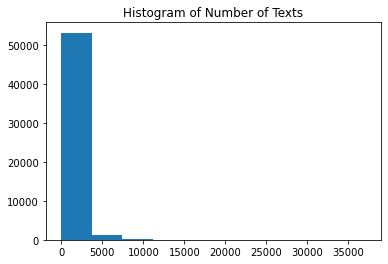

In [66]:
# Place your code here
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.pyplot.hist(ads["num_texts"])
plt.title("Histogram of Number of Texts")


8\. (1.5 Point) How would you characterize the shape of this distribution? Is there anything we can do to the texts variable to make the distribution more bell curved? 

Hint: Let's create a new column in the dataframe called `'log_num_texts'` and print a histogram `'Histogram of Log(Num Texts)'` of it. What might be some advantages of making such a transformation?

Text(0.5, 1.0, 'Histogram of Log(Num Texts)')

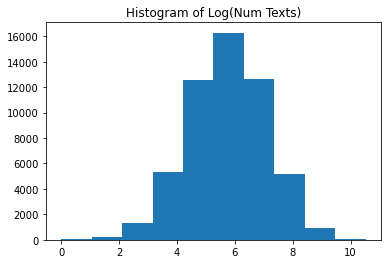

In [67]:
# Place your code and response here
matplotlib.pyplot.hist(np.log(ads["num_texts"]))
plt.title("Histogram of Log(Num Texts)")

End of Homework2